<a href="https://colab.research.google.com/github/strawndri/slaviero-suct-data-analysis/blob/main/Notebooks/analise_estornos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<font size=20> Análise de Dados: Estornos </font>

---




Notebook para analisar os estornos mensais do hotel Slaviero Essential Curitiba Shopping. As variáveis em análise são:

* **Valor**: valor, em reais, do que foi estornado (crédito ou débito);
* **Data**: período dia/mês/ano em que o estorno foi realizado;
* **Hora**: em qual horário do dia o estorno foi realizado. Utiliza-se o padrão de 12 horas;
* **Usuário**: qual funcionário do SUCT realizou o estorno;
* **Motivo**: jusiticativa do estorno.


# 1. Importações


---



## 1.1 Bibliotecas

- Pandas: https://pandas.pydata.org/docs/user_guide/index.html#user-guide
- Matplotlib: https://matplotlib.org/stable/index.html
- Seaborn: https://seaborn.pydata.org/

In [33]:
import pandas as pd

In [34]:
import matplotlib.pyplot as plt

In [35]:
!pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import datetime

## 1.2 Bases de Dados

### Janeiro

In [37]:
dataset_janeiro = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Dados/Estornos/estornos_janeiro.csv')
dataset_janeiro.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde.,Motivo
0,405,55784666,168.63,1/1/2022,10:53:11 AM,CFIOR,1,ERRO DE LANÇAMENTO
1,511,55849601,-240.00,1/1/2022,12:18:41 PM,CFIOR,1,VALOR LANÇADO INCORRET
2,805,55512062,-291.90,1/1/2022,11:17:00 AM,CFIOR,1,ERRO DE LANÇAMENTO
3,805,55512062,-7.27,1/1/2022,11:17:00 AM,CFIOR,1,ERRO DE LANÇAMENTO
4,805,55512062,-291.90,1/1/2022,11:17:00 AM,CFIOR,1,ERRO DE LANÇAMENTO


### Fevereiro

### Março

In [38]:
dataset_marco = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Dados/Estornos/estornos_marco.csv')
dataset_marco.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo
0,1011.0,56559615.0,-185.57,3/1/2022,02:05:00 AM,RFREITAS,1,ERRO DO SISTEMA
1,106.0,56752172.0,-1.25,3/1/2022,04:33:02 PM,FRIGOBAR.SUCT,1,ERRO DE LANÇAMENTO
2,106.0,56752172.0,-24.93,3/1/2022,04:33:02 PM,FRIGOBAR.SUCT,1,ERRO DE LANÇAMENTO
3,108.0,56679610.0,711.12,3/1/2022,01:42:06 AM,RFREITAS,1,Erro de Laçto
4,108.0,56679610.0,-0.01,3/1/2022,01:42:25 AM,RFREITAS,1,ERRO DO SISTEMA


### Abril

### Maio

In [39]:
dataset_maio = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Dados/Estornos/estornos_maio.csv')
dataset_maio.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo
0,107.0,57429723.0,-293.00,5/1/2022,10:04:21 AM,RFELIZ,1,ERRO DO SISTEMA
1,208.0,57825777.0,32.25,5/1/2022,1:48:40 AM,RFELIZ,1,ERRO DE LANÇAMENTO
2,510.0,57813205.0,-196.79,5/1/2022,12:14:57 PM,RFELIZ,1,ERRO DE LANÇAMENTO
3,502.0,57837422.0,-196.24,5/1/2022,11:24:00 PM,RFELIZ,1,ERRO DE LANÇAMENTO
4,510.0,57813205.0,-30.00,5/1/2022,12:13:47 PM,RFELIZ,1,ERRO DE LANÇAMENTO


### Junho

In [40]:
dataset_junho = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Dados/Estornos/estornos_junho.csv')
dataset_junho.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo,Unnamed: 8
0,1008.0,58380248.0,8.00,6/1/2022,12:00:33 PM,IGPESSOA,1,LCTO EM DUPLICIDADE,NaN
1,105.0,57936668.0,144.90,6/1/2022,7:28:51 PM,CALOLIVEIRA,1,Erro de Laçto,NaN
2,109.0,57850003.0,470.40,6/1/2022,9:02:50 AM,LPADOVINO,1,Erro de Laçto,NaN
3,205.0,58380973.0,-5.00,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT,NaN
4,205.0,58380973.0,-3.94,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT,NaN


### Lista de bases de dados

In [41]:
datasets = [{'mês': 'Janeiro', 'dataset': dataset_janeiro},
            {'mês': 'Março', 'dataset': dataset_marco},
            {'mês': 'Maio', 'dataset': dataset_maio},
            {'mês': 'Junho', 'dataset': dataset_junho}]

# 2. Tratamento de Dados


---



## 2.1 Removendo colunas com valores NaN

*Obs.: NaN (Not a Number) representa valores que foram perdidos e que não são apresentados na base de dados.*

> Os dados não preenchidos na coluna de *UH (Unidade Hoteleira)* referem-se aos estornos de valores que não estão associados diretamente a um hóspede. Por exemplo: é possível haver estornos de "café passante", categoria de indíviduos que não se hospedam no hotel, mas consomem deste.



In [42]:
dataset_junho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UH          467 non-null    float64
 1   Reserva     466 non-null    float64
 2   Valor       496 non-null    float64
 3   Data        496 non-null    object 
 4   Hora        496 non-null    object 
 5   Usuário     496 non-null    object 
 6   Qtde        496 non-null    int64  
 7   Motivo      496 non-null    object 
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(4), int64(1), object(4)
memory usage: 35.0+ KB


Nota-se que a última coluna "Unnamed" veio, provavelmente, de algum erro na formação da tabela.

Todos as linhas dessa coluna são NaN e, portanto, devem ser removidos.

In [43]:
dataset_junho.drop(columns = ['Unnamed: 8'], inplace = True)
dataset_junho.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo
0,1008.0,58380248.0,8.00,6/1/2022,12:00:33 PM,IGPESSOA,1,LCTO EM DUPLICIDADE
1,105.0,57936668.0,144.90,6/1/2022,7:28:51 PM,CALOLIVEIRA,1,Erro de Laçto
2,109.0,57850003.0,470.40,6/1/2022,9:02:50 AM,LPADOVINO,1,Erro de Laçto
3,205.0,58380973.0,-5.00,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT
4,205.0,58380973.0,-3.94,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT


## 2.2 Alterando os nomes das colunas

In [44]:
new_columns = {
    'UH': 'UH',	
    'Reserva': 'reserva',
    'Descrição': 'descricao',
    'Crédito': 'credito',
    'Débito': 'debito',
    'Valor': 'valor',
    'Data': 'data',
    'Hora': 'hora',
    'Usuário': 'usuario',
    'Qtde.': 'quantidade',
    'Qtde': 'quantidade',
    'Motivo': 'motivo'
}

for i in datasets:
  i['dataset'].rename(columns = new_columns, inplace = True)

# 3. Funções e variáveis padronizadas

In [45]:
palette = ['#022C30', '#194647', '#256669', '#2E8285', '#3EACB0', '#41B6BA', '#84D9E0', '#9ED7EC', '#D0E9FF']

In [46]:
''' Definições utilizadas em todos os gráficos
- title: título do gráfico
- width: largura do gráfico;
- height: altura do gráfico.
'''
def configurar_plot(width, height, title, ytitle = 0.95):
  sns.set_style('darkgrid')
  plt.figure(figsize=(width, height))
  plt.suptitle(title, y=ytitle, fontsize=24)

In [47]:
''' Função para criação de gráficos de barra
- x: eixo x do gráfico;
- y: eixo y do gráfico;
- xlabel: legenda do eixo x;
- ylabel: legenda do eixo y;
- title: título do gráfico
- data: dataset utilizado;
- hue: parâmetro extra relacionado aos eixos x e y.
'''

def comparar_graficos(tipo_grafico, x, y, xlabel, ylabel, 
                title, palette=palette, 
                data = [], hue=None):

  total = len(data)
  configurar_plot(22, 12, title, 1.05)

  for i, item in enumerate(data):

    if (i == 0):
      ax = plt.subplot(total, 2, i + 1)
    else:
      plt.subplot(total, 2, i + 1)
    
    plt.tight_layout(h_pad=4.0) # espaçamento entre os gráficos
    plt.title(datasets[i]['mês'], fontsize = 18)

    if (tipo_grafico == 'barplot'):
      ax = sns.barplot(x=x, y=y, palette=palette, data=item, hue=hue)
    elif (tipo_grafico == 'lineplot'):
      ax = sns.lineplot(x=x, y=y)

    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_ylabel(ylabel, fontsize = 14)

  ax

# 4. Análise de Dados

## 4.1 Quantidade de estornos por usuário

In [48]:
def frequencia_usuarios(*datasets):

  df_frequencia_usuarios = []

  for i, item in enumerate(datasets):

    frequencia = item.usuario.value_counts()
    usuarios = item.usuario.unique()

    freq_usuarios = pd.DataFrame({'usuarios': usuarios, 'estornos': frequencia})
    df_frequencia_usuarios.append(freq_usuarios)

  return df_frequencia_usuarios

In [49]:
data = frequencia_usuarios(dataset_janeiro, dataset_marco, dataset_maio, dataset_junho)

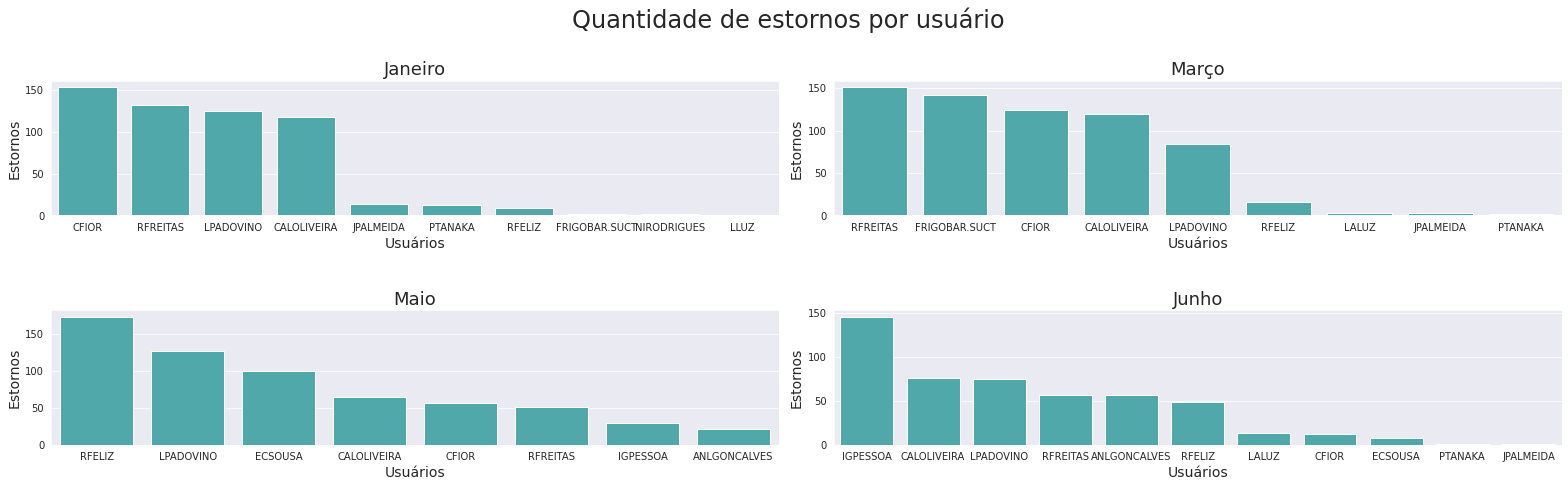

In [54]:
graphic = comparar_graficos(tipo_grafico='barplot', x='usuarios', y='estornos', 
                      xlabel = 'Usuários', ylabel ='Estornos', 
                      title = 'Quantidade de estornos por usuário',
                      palette = [palette[5]],
                      data = data)
graphic

## 4.2 Quantidade de estornos diários

In [51]:
estornos_por_dia = pd.value_counts(dataset_janeiro.data)
dias = []
for i in dataset_maio.data.unique():
  dias.append(i[2:-5])

In [52]:
# set_lineplot(dias, estornos_por_dia, "Dias", 'Quantidade', title = 'Estornos por dia')

NameError: ignored

## 4.3 Quantidade de estornos realizada por cada usuário (classificação)

In [ ]:
motivos_por_usuario = pd.crosstab(dataset_maio['usuario'], dataset_maio['motivo'])
motivos_por_usuario = pd.DataFrame(motivos_por_usuario.stack().reset_index())
motivos_por_usuario.rename(columns = {0: 'total'}, inplace = True)
motivos_por_usuario.sort_values(by=['total'], ascending = False, inplace = True)

motivos_por_usuario

In [ ]:
# set_barplot('usuario', 'total', motivos_por_usuario, 
#             'Usuário', 'Estornos', 
#             'Frequência de estornos por usuário (com base em seus motivos)',
#             hue = 'motivo')

## 4.4 Valor total de estornos por dia

In [ ]:
# valor_por_dia = dataset.groupby(['data'])['valor'].sum()

In [ ]:
# for i in range(0, len(valor_por_dia)):
#   if valor_por_dia[i] <= 0:
#     valor_por_dia[i] *= -1

In [ ]:
# set_lineplot(dias, valor_por_dia, "Dias", 'Valor (R$)', 'Valor, em reais, de estornos por dia')